In [1]:
import scanpy as sc
import pycisTopic
from pycisTopic.cistopic_class import *
import pickle
import os
import pickle


In [2]:
cellltype = 'HIP_HIP_GABA'
ctname = 'HIP_GABA'

In [3]:
# Process the anndata object of 
def pre_process_anndata(input_file, output_file):
    # Filter cells based on quality control metrics
    adata_sc = sc.read_h5ad(input_file)
    adata_sc.layers['counts']
    adata_sc_raw = adata_sc.copy()
    adata_sc_raw.X = adata_sc.layers['counts'].copy()
    adata_sc.raw = adata_sc_raw
    adata_sc.obs['condition'] = ("M"+adata_sc.obs['status'].astype(str)).astype('category')
    adata_sc.obs['GEX:condition'] = adata_sc.obs['condition'].astype('category')
    adata_sc.write_h5ad(
        output_file
    )
    return adata_sc

In [4]:
adata_sc = pre_process_anndata(
    input_file=f'/data1st2/junyi/output/atac0416/subset/region_nt/{ctname}_sc.h5ad',
    output_file=f'/data1st2/junyi/output/atac0416/subset/region_nt/{cellltype}_sc.h5ad'
)

In [5]:

models = pickle.load(
    open(f"/data1st2/junyi/output/atac0416/cistopic/cistopic_{cellltype}_models.pkl", "rb")
)

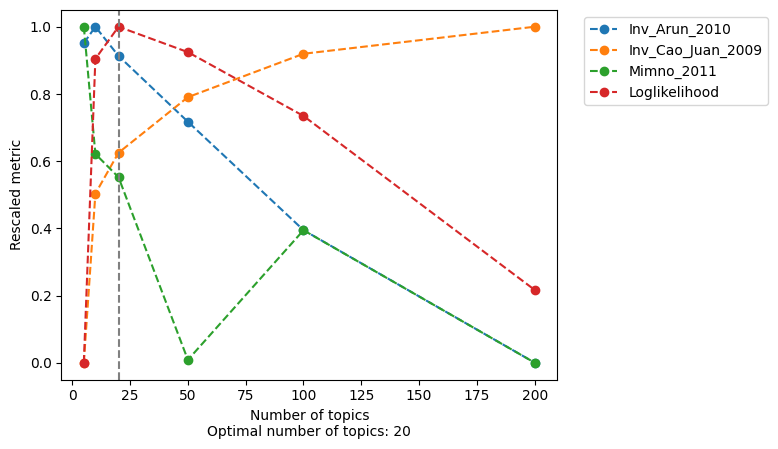

In [6]:
from pycisTopic.lda_models import evaluate_models
model = evaluate_models(
    models,
    min_topics_coh=0,
    select_model = 20,
    return_model = True
)


In [7]:
model

In [8]:
pycis_topic_obj = pickle.load(
    open(f"/data1st2/junyi/output/atac0416/cistopic/cistopic_{cellltype}.pkl", "rb")
)

In [9]:
pycis_topic_obj.add_LDA_model(model)


In [10]:
pickle.dump(
    pycis_topic_obj,
    open(os.path.join('/data1st2/junyi/output/atac0416/cistopic', f"cistopic_{cellltype}.pkl"), "wb")
)


In [11]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)

In [12]:
# find_clusters(
#     pycis_topic_obj,
#     target  = 'cell',
#     k = 10,
#     res = [0.6, 1.2, 2],
#     prefix = 'pycisTopic_',
#     scale = True,
#     split_pattern = '-'
# )


In [13]:
# run_umap(
#     pycis_topic_obj,
#     target  = 'cell', scale=True)


In [14]:
pycis_topic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,sample,leiden,celltype.L2,leiden_tile,celltype.L1,...,Neurotransmitter_celltype,region_nt,celltype.L3,celltype.L4,expriment,farcq,fracHQP,ACC:celltype.L2,condtion,ACC:condtion
MC39C_HIP:AAACGAACAATGATGA-1___cisTopic,26194,4.418202,23277,4.366927,cisTopic,MC39C_HIP,1,Hippo_Lamp5_GABA,1,Neuron,...,GABAergic,HIP_GABA,Hippo_Lamp5_GABA-0,Hippo_Lamp5_GABA-0-0,MC,0,0.2872,Hippo_Lamp5_GABA,MC,MC
MC39C_HIP:AAAGATGAGAACAGGA-1___cisTopic,2104,3.323046,2062,3.314289,cisTopic,MC39C_HIP,1,Hippo_Pvalb_GABA,1,Neuron,...,GABAergic,HIP_GABA,Hippo_Pvalb_GABA-0,Hippo_Pvalb_GABA-0-0,MC,0,0.2872,Hippo_Pvalb_GABA,MC,MC
MC39C_HIP:AAAGGATGTCCTATTT-1___cisTopic,47297,4.674834,37684,4.576157,cisTopic,MC39C_HIP,1,Hippo_Pvalb_GABA,1,Neuron,...,GABAergic,HIP_GABA,Hippo_Pvalb_GABA-0,Hippo_Pvalb_GABA-0-0,MC,0,0.2872,Hippo_Pvalb_GABA,MC,MC
MC39C_HIP:AAAGGATGTTCTGAGT-1___cisTopic,24810,4.394627,21461,4.33165,cisTopic,MC39C_HIP,1,Hippo_Htr3a_GABA,1,Neuron,...,GABAergic,HIP_GABA,Hippo_Htr3a_GABA-0,Hippo_Htr3a_GABA-0-0,MC,0,0.2872,Hippo_Htr3a_GABA,MC,MC
MC39C_HIP:AAAGGGCAGACGCCAA-1___cisTopic,10962,4.03989,9940,3.997386,cisTopic,MC39C_HIP,5,Hippo_Sst_GABA,5,Neuron,...,GABAergic,HIP_GABA,Hippo_Sst_GABA-1,Hippo_Sst_GABA-1-0,MC,0,0.2872,Hippo_Sst_GABA,MC,MC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MW51A_HIP:TTTGCGCAGTAGTTCC-1___cisTopic,15521,4.19092,13961,4.144917,cisTopic,MW51A_HIP,1,Hippo_Sst_GABA,1,Neuron,...,GABAergic,HIP_GABA,Hippo_Sst_GABA-1,Hippo_Sst_GABA-1-0,MW,2,0.3944,Hippo_Sst_GABA,MW,MW
MW51A_HIP:TTTGCGCGTCAACTGT-1___cisTopic,4585,3.661339,4195,3.622732,cisTopic,MW51A_HIP,1,Hippo_Pvalb_GABA,1,Neuron,...,GABAergic,HIP_GABA,Hippo_Pvalb_GABA-0,Hippo_Pvalb_GABA-0-0,MW,2,0.3944,Hippo_Pvalb_GABA,MW,MW
MW51A_HIP:TTTGGCCTCATGTTCT-1___cisTopic,12176,4.085505,10949,4.039374,cisTopic,MW51A_HIP,1,Hippo_Lamp5_GABA,1,Neuron,...,GABAergic,HIP_GABA,Hippo_Lamp5_GABA-0,Hippo_Lamp5_GABA-0-0,MW,2,0.3944,Hippo_Lamp5_GABA,MW,MW
MW51A_HIP:TTTGGCCTCTTGTGCC-1___cisTopic,19071,4.280373,15828,4.199426,cisTopic,MW51A_HIP,1,Hippo_Pvalb_GABA,1,Neuron,...,GABAergic,HIP_GABA,Hippo_Pvalb_GABA-1,Hippo_Pvalb_GABA-1-0,MW,2,0.3944,Hippo_Pvalb_GABA,MW,MW


In [15]:
pycis_topic_obj

In [16]:
# plot_metadata(
#     pycis_topic_obj,
#     reduction_name='UMAP',
#     variables=['celltype.L2'],
#     target='cell', num_columns=1,
#     text_size=10,
#     dot_size=5)


In [17]:
# annot_dict = {}
# for resolution in [0.6, 1.2, 3]:
#     annot_dict[f"pycisTopic_leiden_10_{resolution}"] = {}
#     for cluster in set(pycis_topic_obj.cell_data[f"pycisTopic_leiden_10_{resolution}"]):
#         counts = pycis_topic_obj.cell_data.loc[
#             pycis_topic_obj.cell_data.loc[pycis_topic_obj.cell_data[f"pycisTopic_leiden_10_{resolution}"] == cluster].index,
#             "celltype.L2"].value_counts()
#         annot_dict[f"pycisTopic_leiden_10_{resolution}"][cluster] = f"{counts.index[counts.argmax()]}({cluster})"


In [18]:
# for resolution in [0.6, 1.2, 3]:
#     pycis_topic_obj.cell_data[f'pycisTopic_leiden_10_{resolution}'] = [
#         annot_dict[f'pycisTopic_leiden_10_{resolution}'][x] for x in pycis_topic_obj.cell_data[f'pycisTopic_leiden_10_{resolution}'].tolist()
#     ]


In [19]:
# plot_metadata(
#     pycis_topic_obj,
#     reduction_name='UMAP',
#     variables=['celltype.L2', 'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'celltype.L3'],
#     target='cell', num_columns=4,
#     text_size=10,
#     dot_size=5)


In [20]:
# plot_topic(
#     pycis_topic_obj,
#     reduction_name = 'UMAP',
#     target = 'cell',
#     num_columns=5
# )


In [21]:
# if isinstance(pycis_topic_obj.cell_data.index, pd.MultiIndex):
#     pycis_topic_obj.cell_data = pycis_topic_obj.cell_data.reset_index()


In [22]:
# pycis_topic_obj.cell_data['celltype.L2'] = pycis_topic_obj.cell_data['celltype.L2'].astype('str')pycis_topic_obj.cell_data['celltype.L2'].astype('str').replace("Hippo_","")
pycis_topic_obj.cell_data['celltype.L2str'] = pycis_topic_obj.cell_data['celltype.L2'].astype('str').str.replace("Hippo_","")
pycis_topic_obj.cell_data['C'] = pycis_topic_obj.cell_data['condtion'].astype('str')

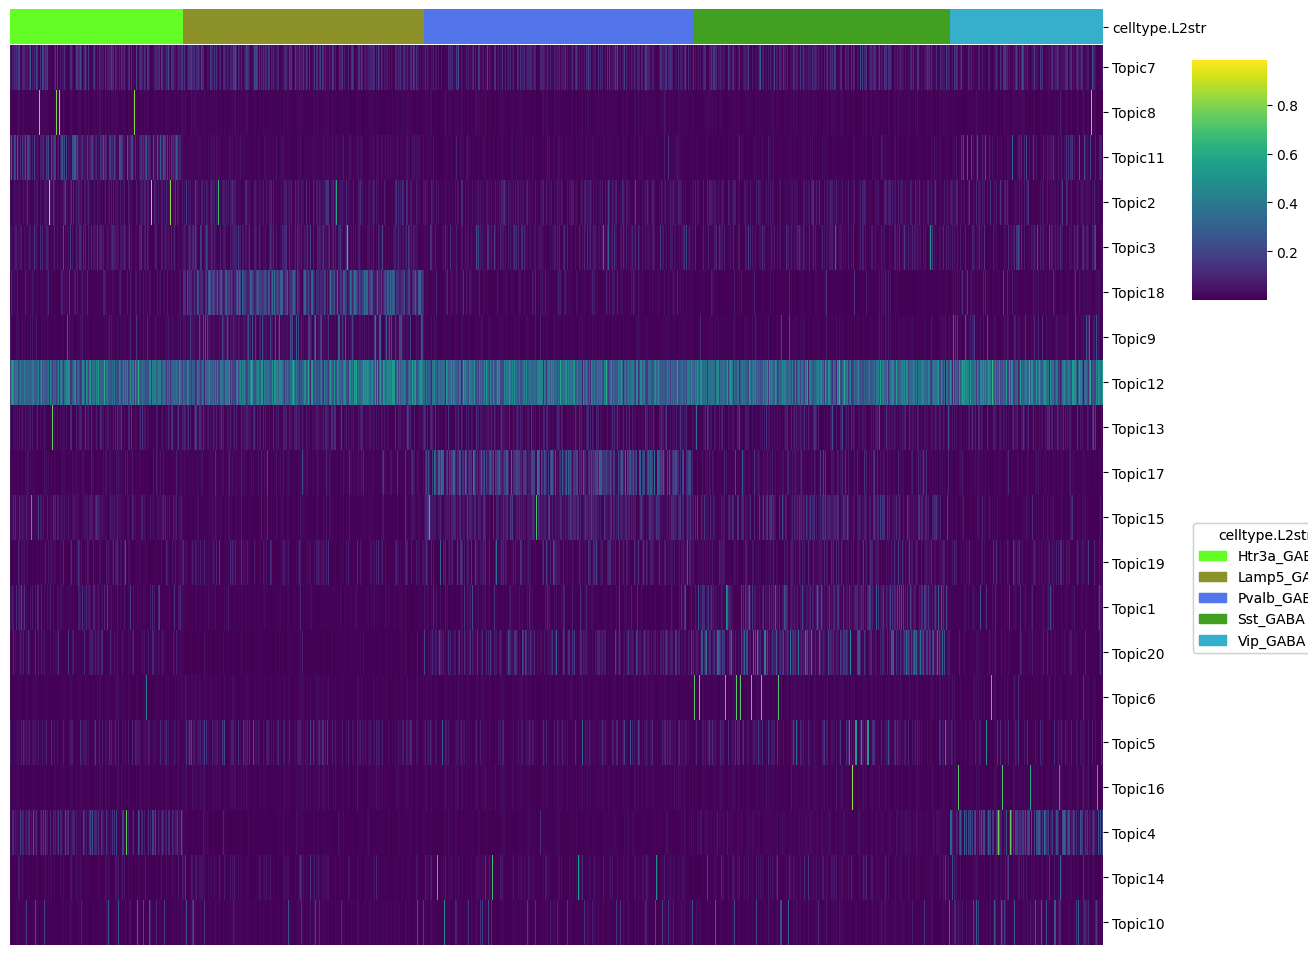

In [23]:
cell_topic_heatmap(
    pycis_topic_obj,
    variables = ['celltype.L2str'],
    scale = False,
    legend_loc_x = 0.98,
    legend_loc_y = -1.2,
    legend_dist_y = -1.5,
    figsize = (15, 12),
)


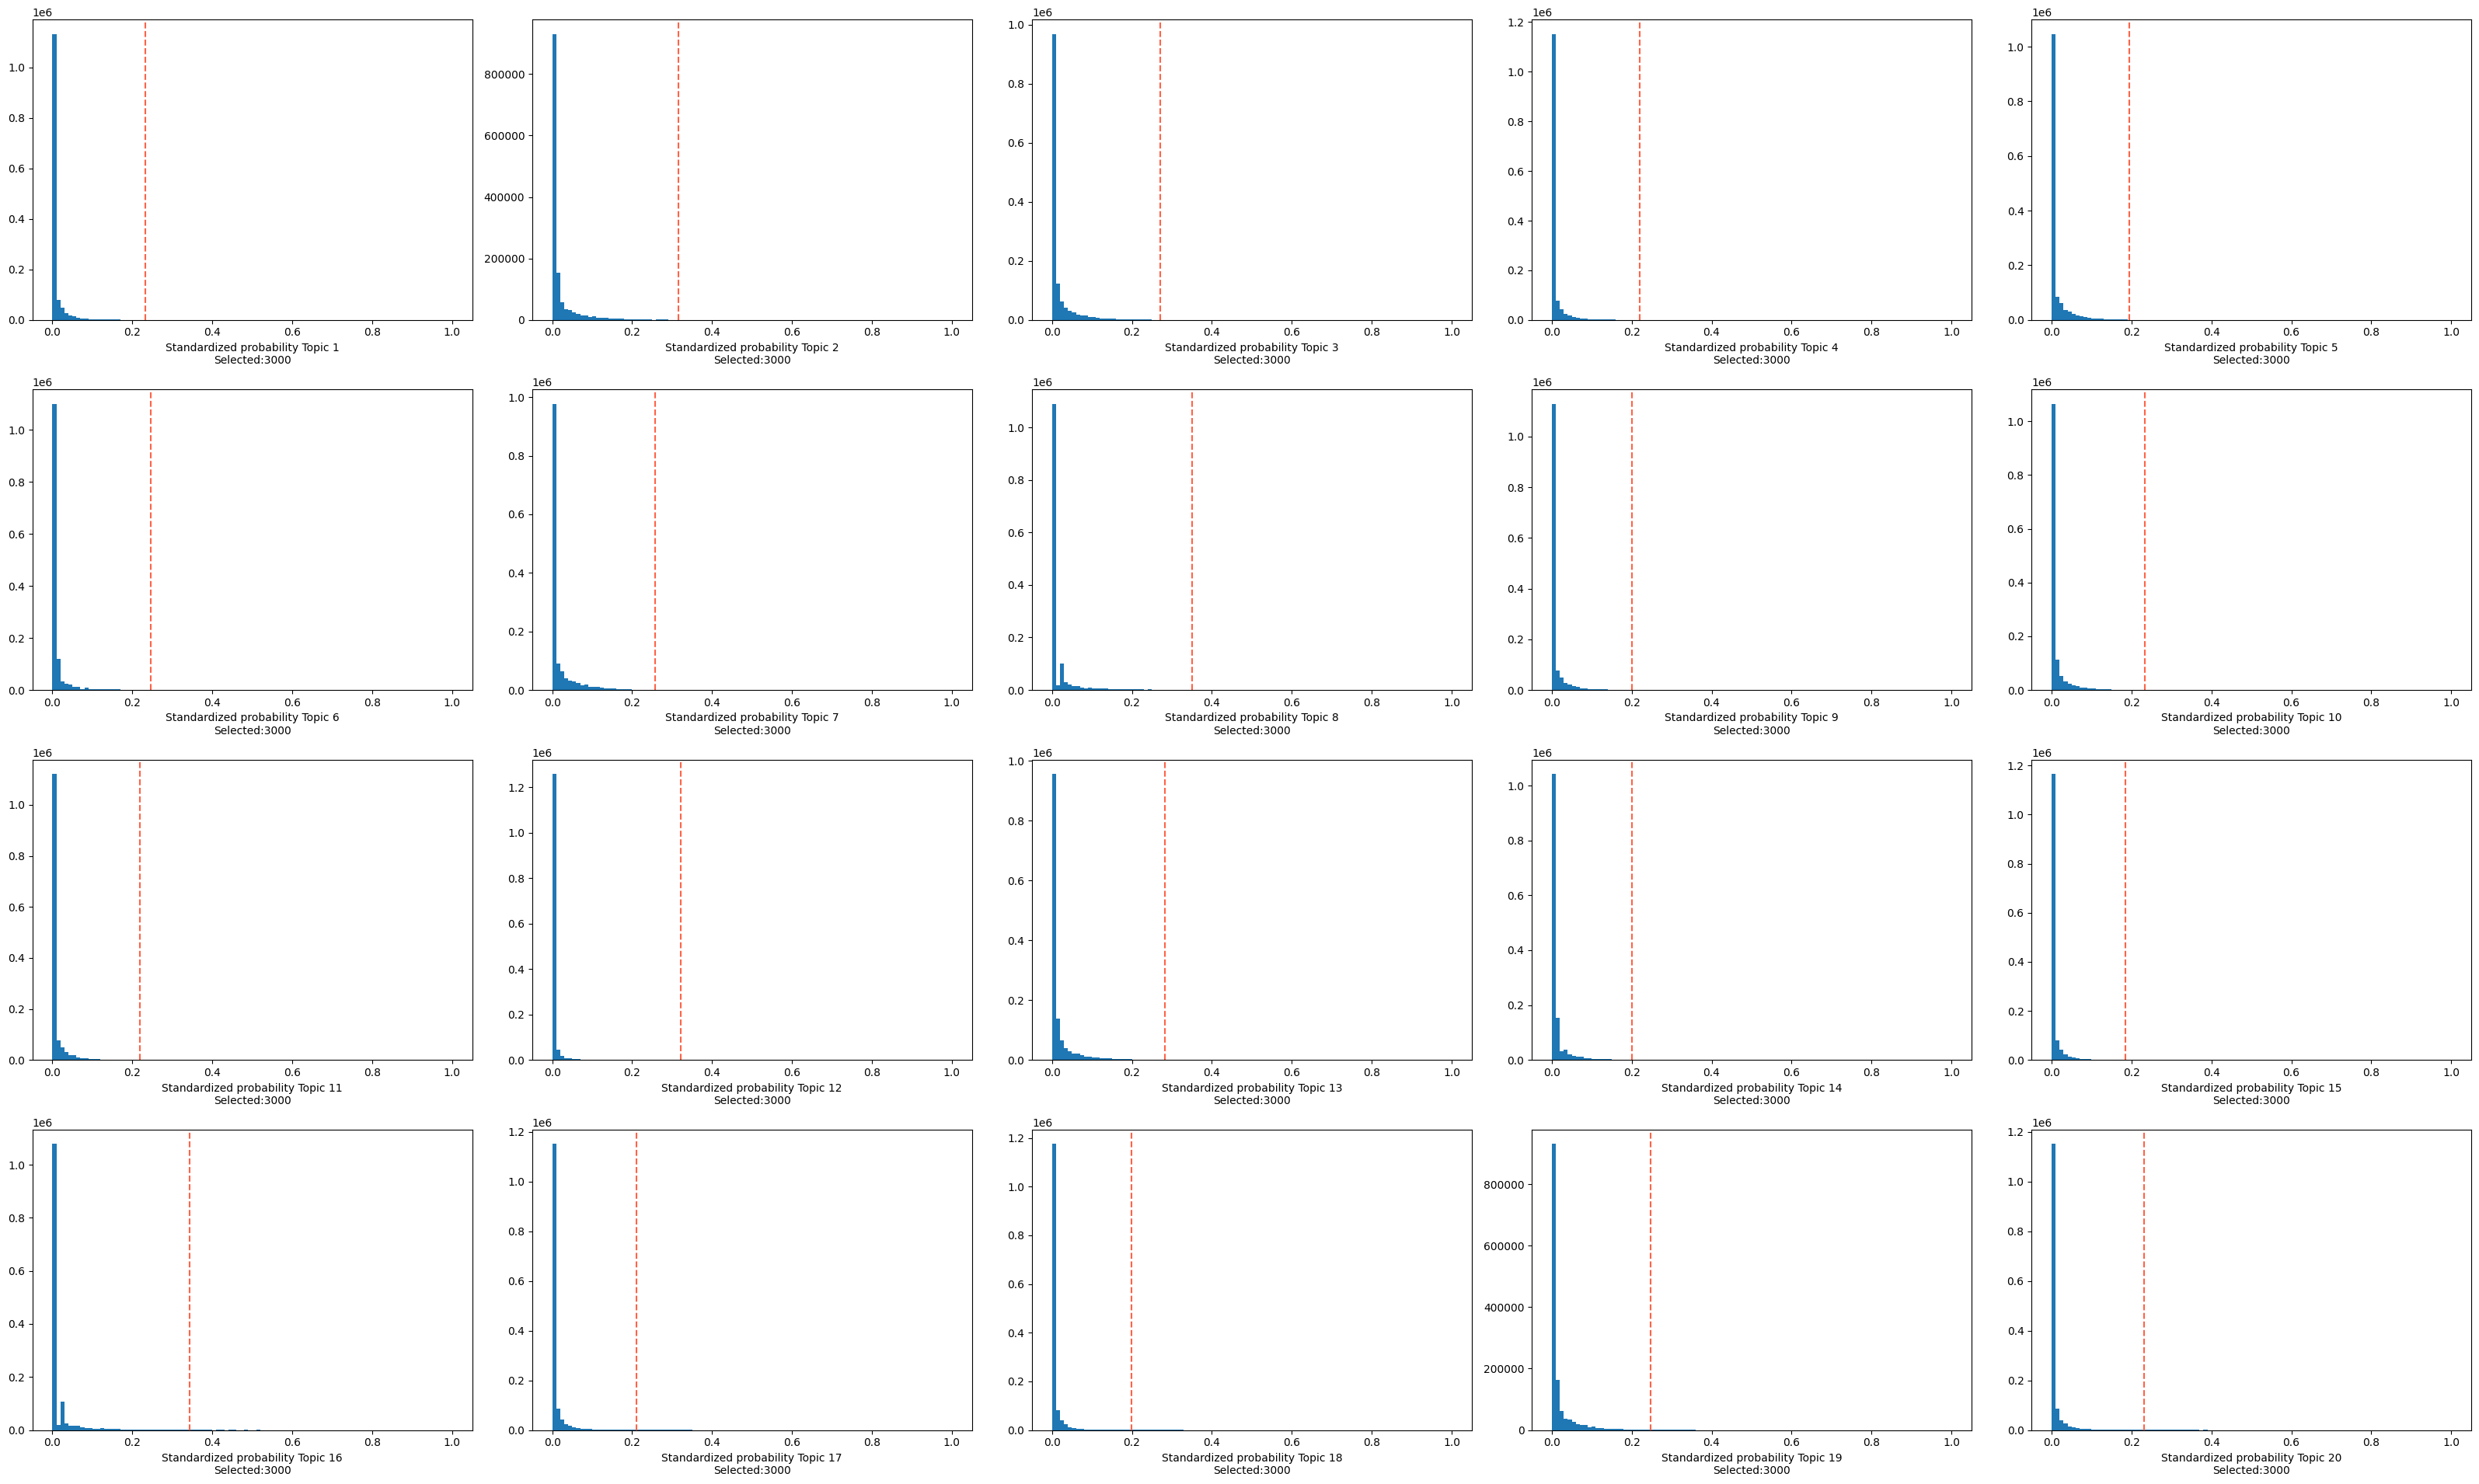

In [24]:
from pycisTopic.topic_binarization import binarize_topics
region_bin_topics_top_3k = binarize_topics(
    pycis_topic_obj, method='ntop', ntop = 3_000,
    plot=True, num_columns=5
)


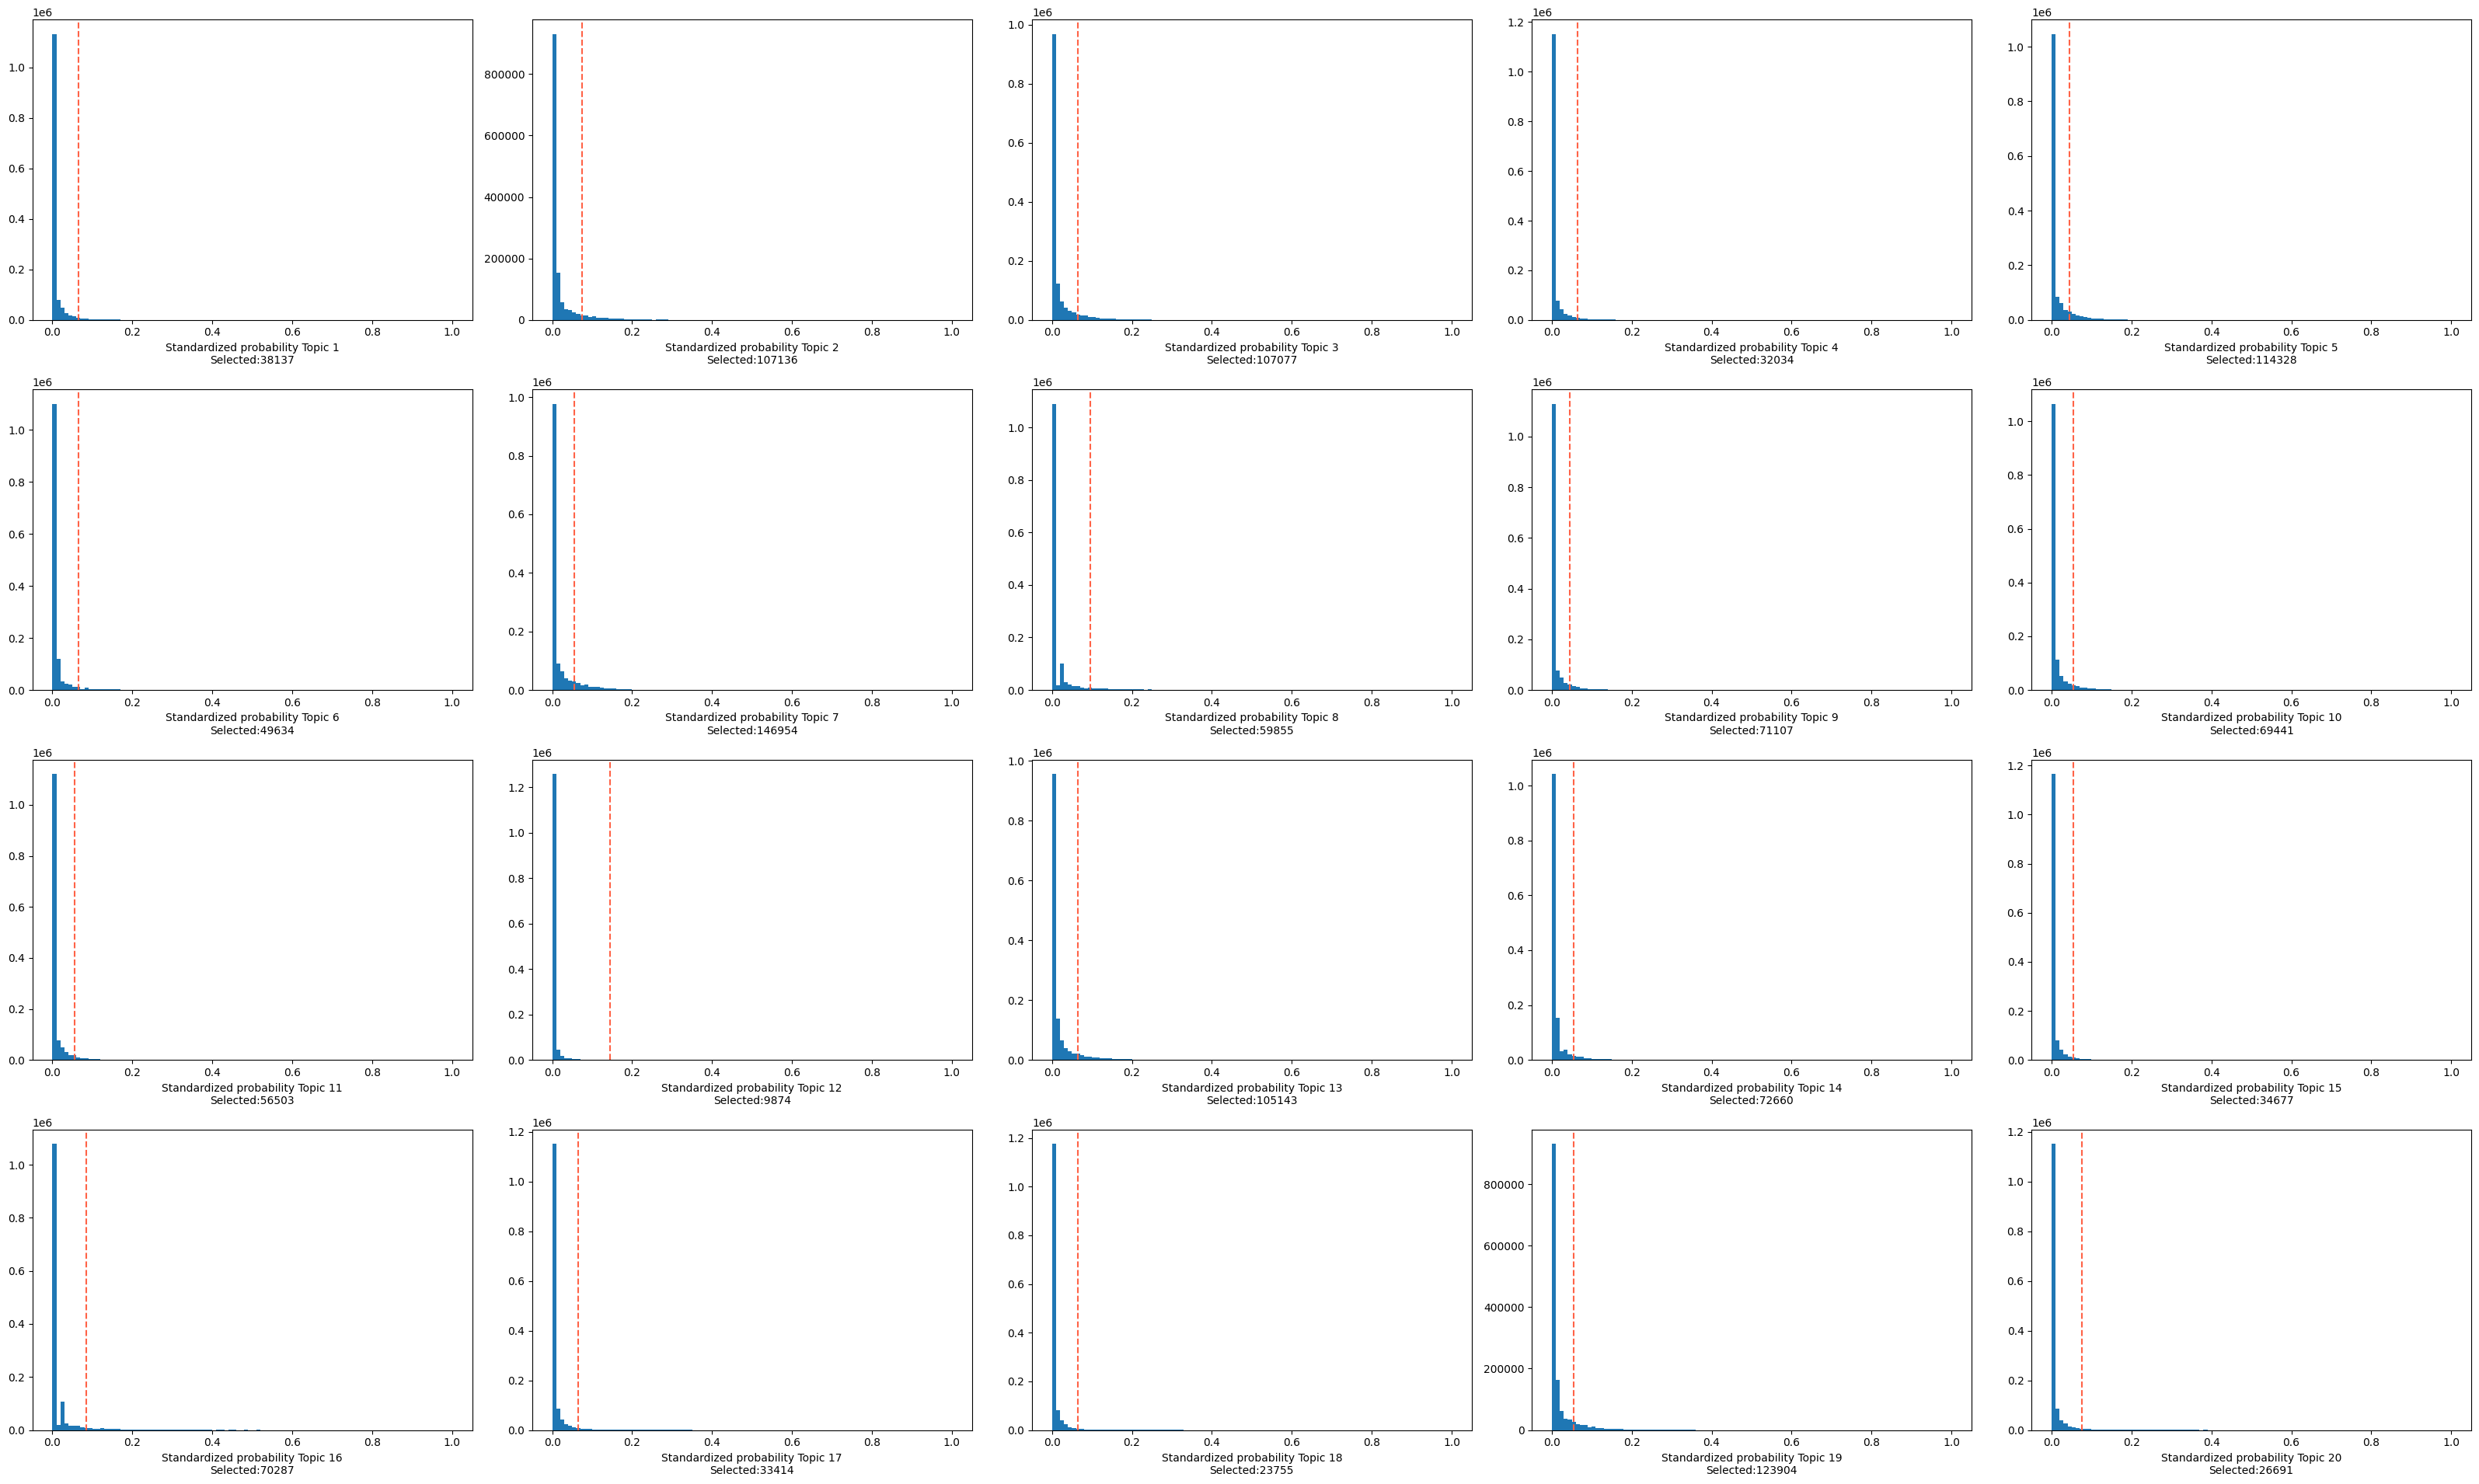

In [25]:
region_bin_topics_otsu = binarize_topics(
    pycis_topic_obj, method='otsu',
    plot=True, num_columns=5
)


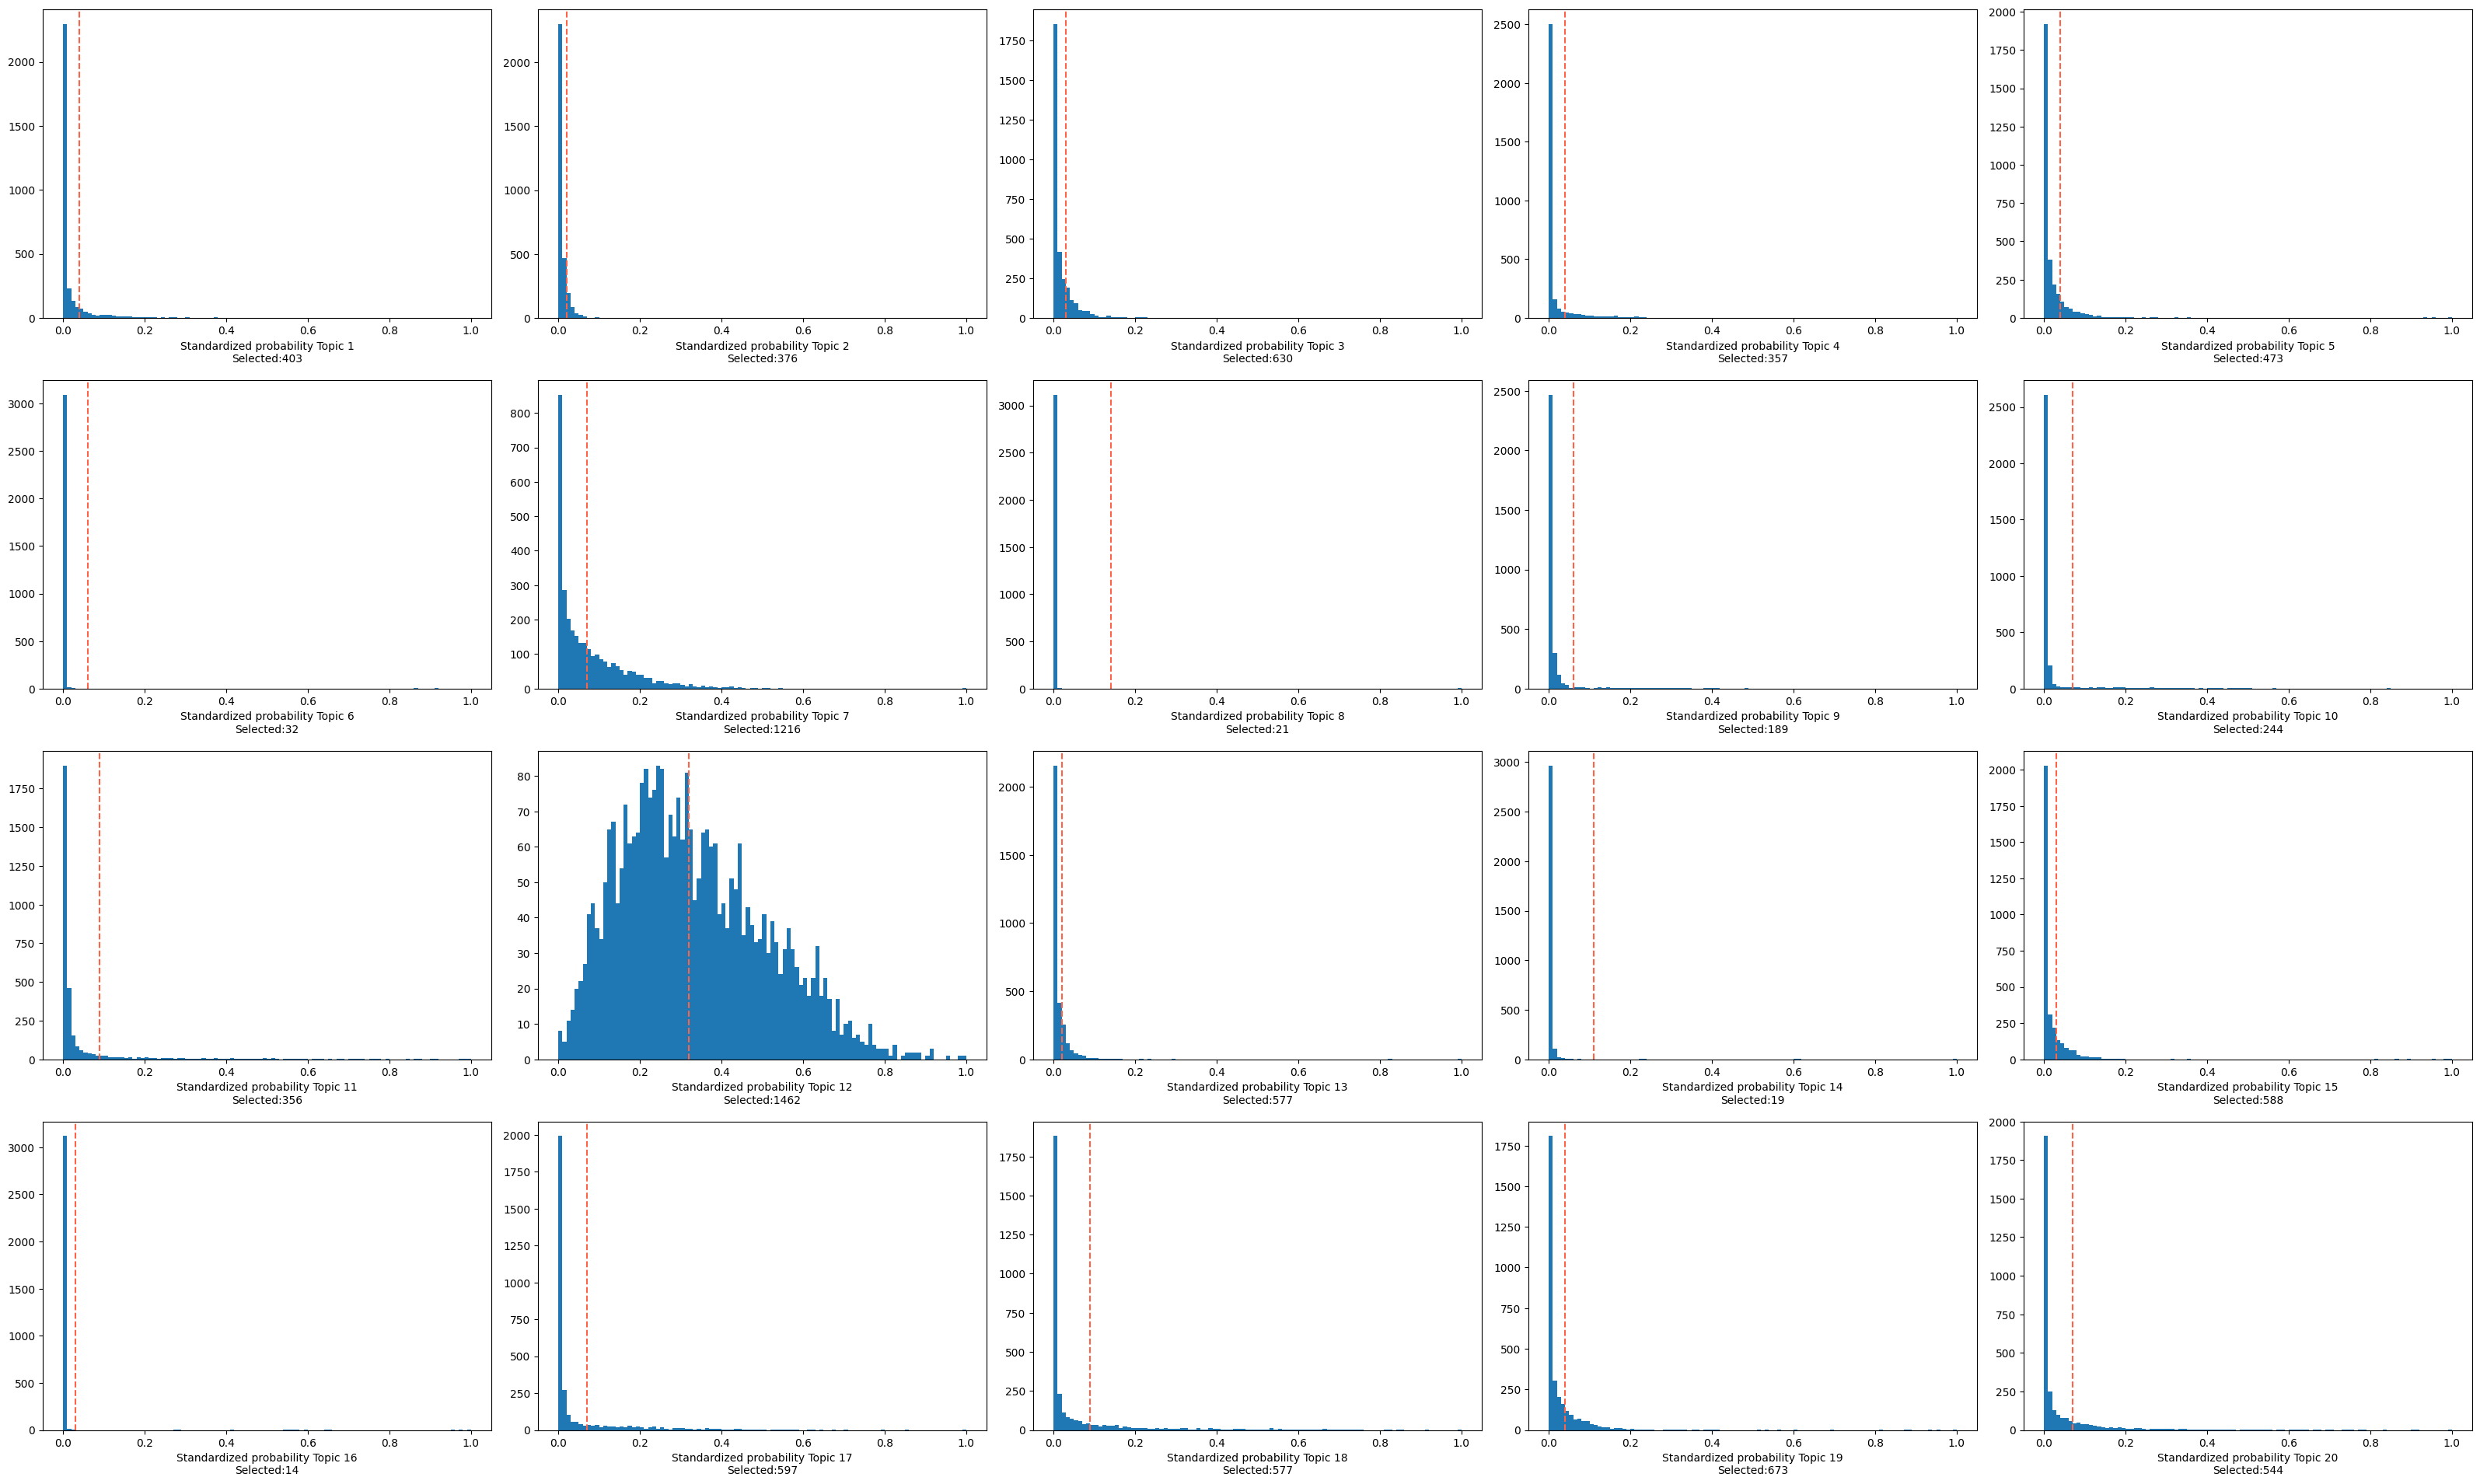

In [26]:
binarized_cell_topic = binarize_topics(
    pycis_topic_obj,
    target='cell',
    method='li',
    plot=True,
    num_columns=5, nbins=100)


In [27]:
from pycisTopic.topic_qc import compute_topic_metrics, plot_topic_qc, topic_annotation
import matplotlib.pyplot as plt
from pycisTopic.utils import fig2img


In [28]:
topic_qc_metrics = compute_topic_metrics(pycis_topic_obj)


In [29]:
fig_dict={}
fig_dict['CoherenceVSAssignments']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Log10_Assignments', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['AssignmentsVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Log10_Assignments', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSRegions_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Regions_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSMarginal_dist']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Marginal_topic_dist', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSGini_index']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Gini_index', var_color='Gini_index', plot=False, return_fig=True)


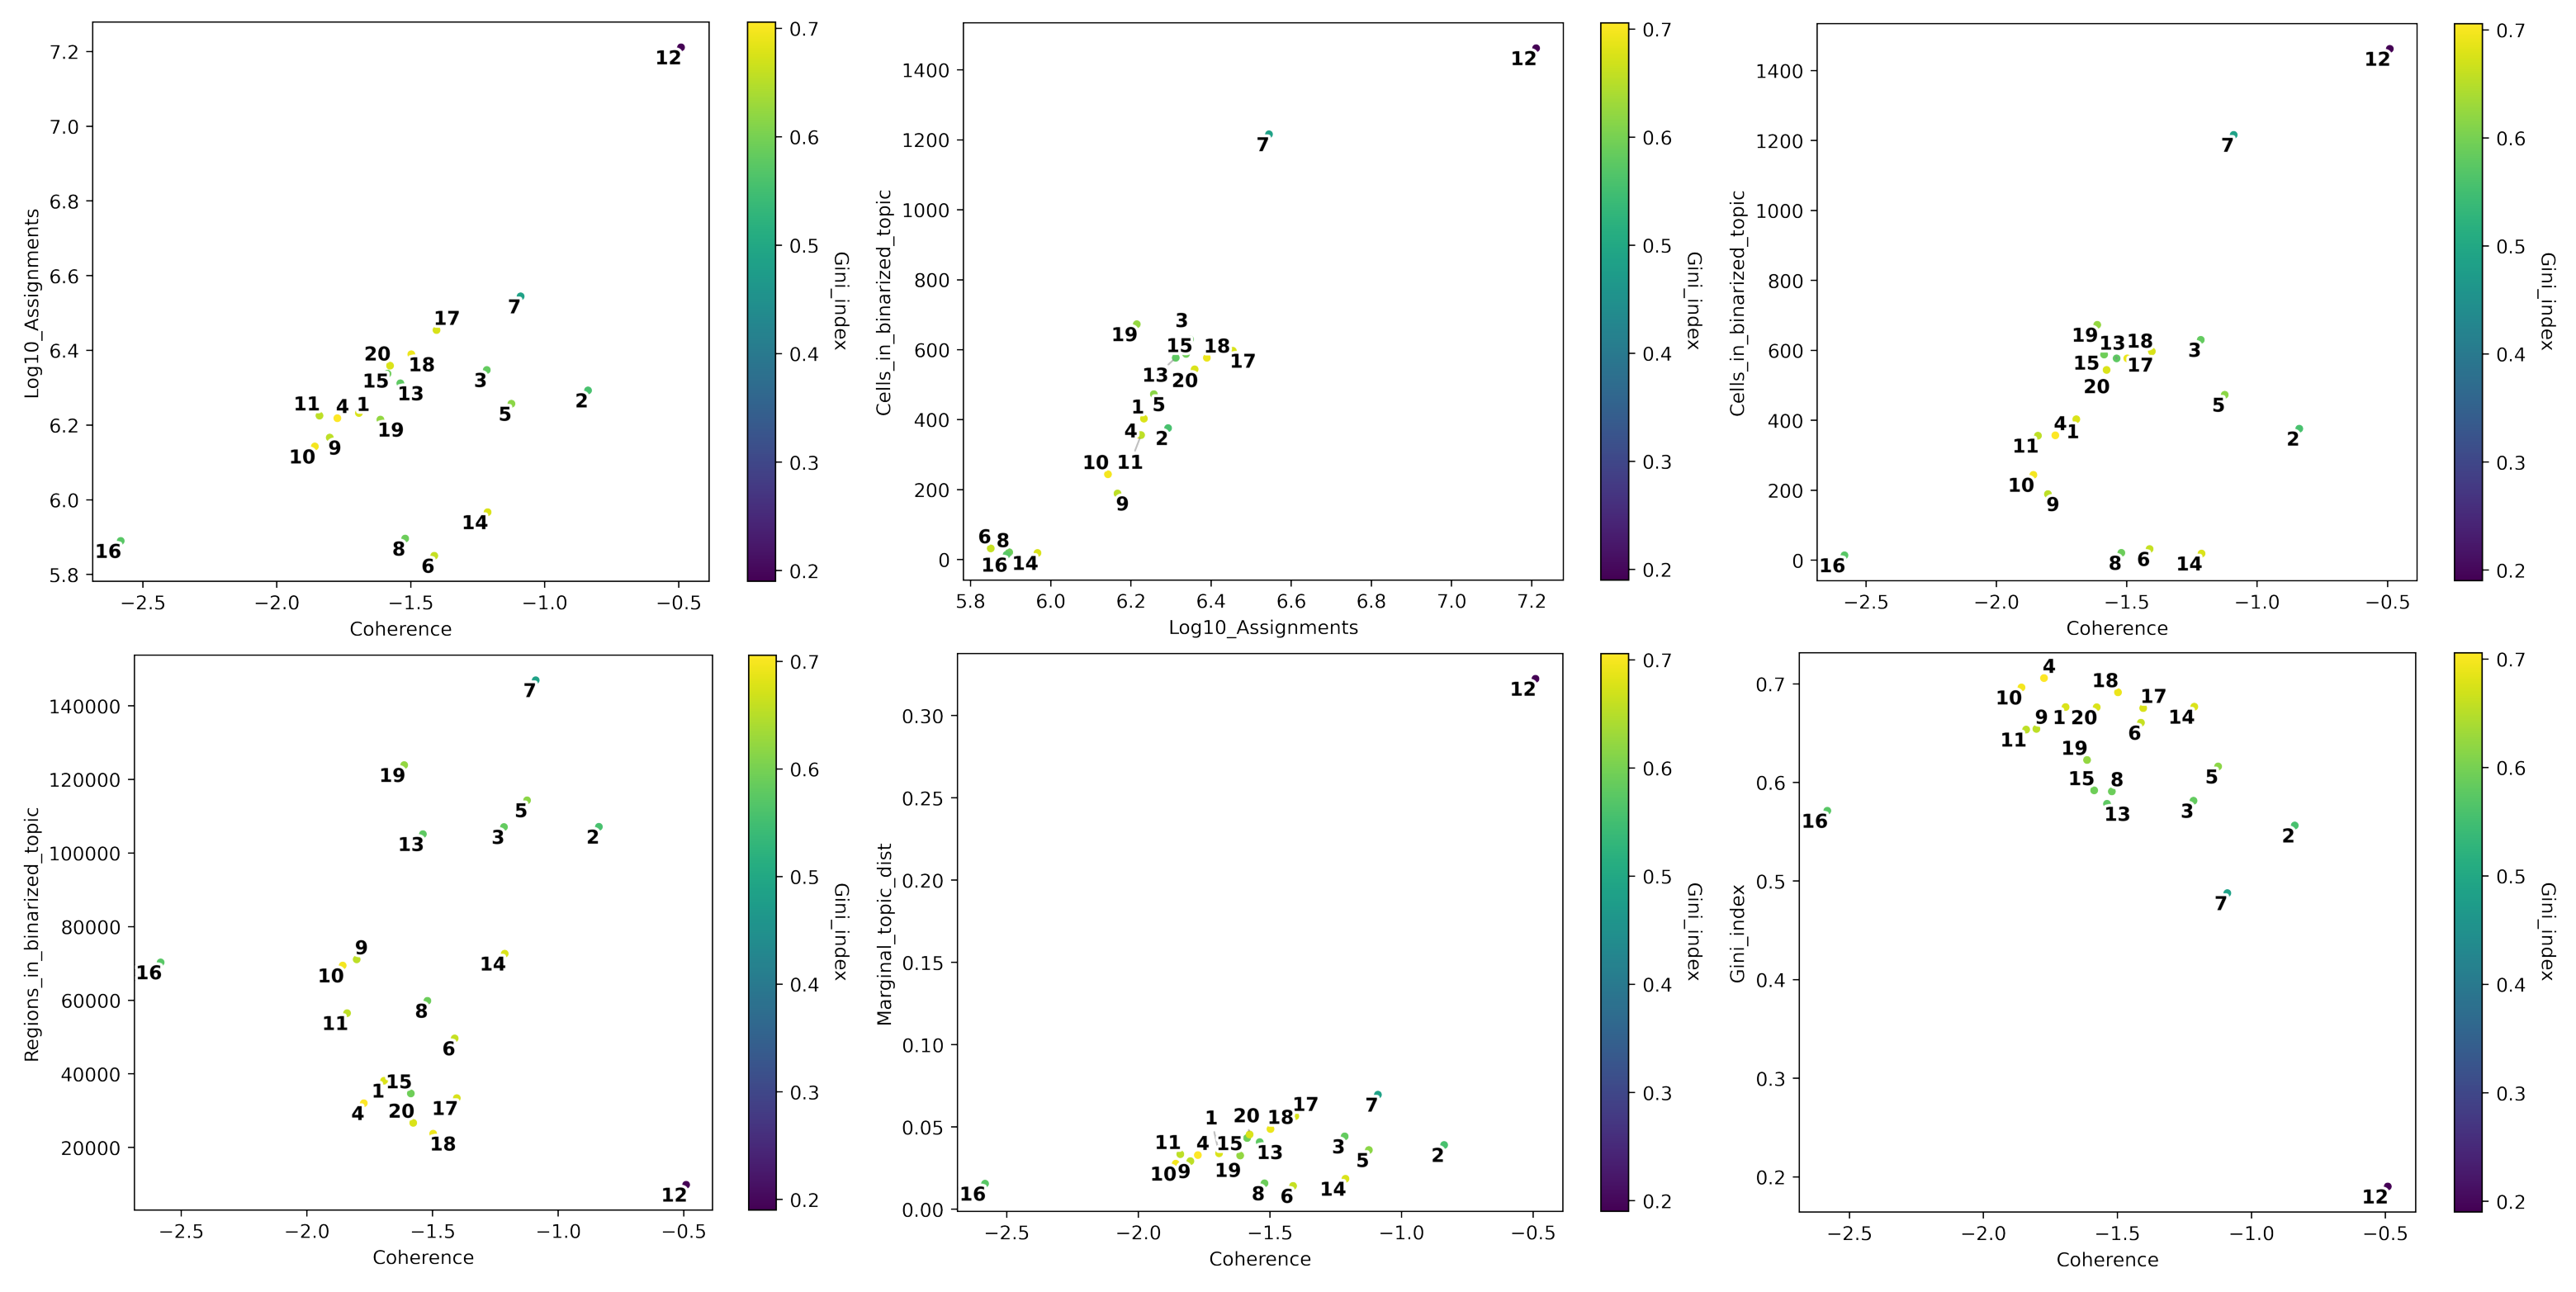

In [30]:
# Plot topic stats in one figure
fig=plt.figure(figsize=(40, 43))
i = 1
for fig_ in fig_dict.keys():
    plt.subplot(2, 3, i)
    img = fig2img(fig_dict[fig_]) #To convert figures to png to plot together, see .utils.py. This converts the figure to png.
    plt.imshow(img)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0, hspace=-0.70)
plt.show()


In [31]:
topic_annot = topic_annotation(
    pycis_topic_obj,
    annot_var='celltype.L2',
    binarized_cell_topic=binarized_cell_topic,
    general_topic_thr = 0.2
)


/home/junyichen/anaconda3/envs/scenicplus/lib/python3.11/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std


In [32]:
topic_annot

,celltype.L2,Ratio_cells_in_topic,Ratio_group_in_population,is_general
Topic1,Hippo_Sst_GABA,0.128099,0.235855,False
Topic2,Hippo_Lamp5_GABA,0.119517,0.221233,False
Topic3,Hippo_Htr3a_GABA,0.200254,0.157978,False
Topic4,"Hippo_Htr3a_GABA, Hippo_Vip_GABA",0.113477,0.297203,False
Topic5,Hippo_Sst_GABA,0.15035,0.235855,False
Topic6,Hippo_Sst_GABA,0.010172,0.235855,False
Topic7,"Hippo_Lamp5_GABA, Hippo_Htr3a_GABA",0.386523,0.379212,False
Topic8,Hippo_Htr3a_GABA,0.006675,0.157978,False
Topic9,"Hippo_Lamp5_GABA, Hippo_Vip_GABA",0.060076,0.360458,False
Topic10,Hippo_Vip_GABA,0.077559,0.139224,False


In [33]:
region_bin_topics_otsu

{'Topic1':                             Topic1
 chr4:34993186-34993687    0.012231
 chr6:103944286-103944787  0.011580
 chr9:47923601-47924102    0.011506
 chr19:36150531-36151032   0.011262
 chr4:31727773-31728274    0.011102
 ...                            ...
 chr1:122393301-122393802  0.000804
 chr6:3767647-3768148      0.000804
 chr7:59221721-59222222    0.000804
 chr19:21490502-21491003   0.000804
 chr6:66978514-66979015    0.000804
 
 [38137 rows x 1 columns],
 'Topic2':                              Topic2
 chr17:39848454-39848955    0.005716
 chr15:100917476-100917977  0.005142
 chr15:81946639-81947140    0.004765
 chr19:46044284-46044785    0.004578
 chr17:36231234-36231735    0.004542
 ...                             ...
 chr15:71193847-71194348    0.000429
 chr15:91250404-91250905    0.000429
 chr2:102989954-102990455   0.000429
 chr14:17842447-17842948    0.000429
 chr1:69657078-69657579     0.000429
 
 [107136 rows x 1 columns],
 'Topic3':                              Topic

In [34]:
import os

out_dir = f'/data1st2/junyi/output/atac0416/cistopic/{cellltype}'

if not os.path.exists(out_dir):
    os.makedirs(out_dir, exist_ok=True)
if not os.path.exists(os.path.join(out_dir, "region_sets")):
    os.makedirs(os.path.join(out_dir, "region_sets"), exist_ok=True)


os.makedirs(os.path.join(out_dir, "region_sets"), exist_ok=True)
os.makedirs(os.path.join(out_dir, "region_sets", "Topics_otsu"), exist_ok=True)
os.makedirs(os.path.join(out_dir, "region_sets", "Topics_top_3k"), exist_ok=True)
os.makedirs(os.path.join(out_dir, "region_sets", "DARs"), exist_ok=True)



In [35]:
from pycisTopic.utils import region_names_to_coordinates


In [36]:
for topic in region_bin_topics_otsu:
    region_names_to_coordinates(
        region_bin_topics_otsu[topic].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "Topics_otsu", f"{topic}.bed"),
        sep = "\t",
        header = False, index = False
    )


In [37]:
for topic in region_bin_topics_top_3k:
    region_names_to_coordinates(
        region_bin_topics_top_3k[topic].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "Topics_top_3k", f"{topic}.bed"),
        sep = "\t",
        header = False, index = False
    )

In [38]:
scenic_dir = f'/data1st2/junyi/output/atac0416/scenic/{cellltype}'

In [39]:
df_dar= pd.read_csv(
    '/data2st1/junyi/output/atac0526/dar/region_nt/mementob_cr_annotated.csv')

In [40]:
df_dar_UP = df_dar.loc[
    (df_dar['ctname'] == ctname) & (df_dar['regulation'] == 'Up')
]
df_dar_bed = df_dar_UP.names.str.split(r'[:-]',expand=True)
df_dar_bed.iloc[:, 1] = df_dar_bed.iloc[:, 1].astype(int)
df_dar_bed.iloc[:, 2] = df_dar_bed.iloc[:, 2].astype(int)
df_dar_bed.sort_values(
    [0, 1, 2]
).to_csv(
    os.path.join(out_dir, "region_sets", "DARs", f"CUMS_Up.bed"),
    sep = "\t",
    header = False, index = False
)

/tmp/ipykernel_517646/3373426826.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_dar_bed.iloc[:, 1] = df_dar_bed.iloc[:, 1].astype(int)
/tmp/ipykernel_517646/3373426826.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_dar_bed.iloc[:, 2] = df_dar_bed.iloc[:, 2].astype(int)


In [41]:
df_dar_DOWN = df_dar.loc[
    (df_dar['ctname'] == ctname) & (df_dar['regulation'] == 'Down')
]
df_dar_bed = df_dar_DOWN.names.str.split(r'[:-]',expand=True)
df_dar_bed.iloc[:, 1] = df_dar_bed.iloc[:, 1].astype(int)
df_dar_bed.iloc[:, 2] = df_dar_bed.iloc[:, 2].astype(int)
df_dar_bed.sort_values(
    [0, 1, 2]
).to_csv(
    os.path.join(out_dir, "region_sets", "DARs", f"CUMS_Down.bed"),
    sep = "\t",
    header = False, index = False
)

/tmp/ipykernel_517646/2422891388.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_dar_bed.iloc[:, 1] = df_dar_bed.iloc[:, 1].astype(int)
/tmp/ipykernel_517646/2422891388.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_dar_bed.iloc[:, 2] = df_dar_bed.iloc[:, 2].astype(int)


In [42]:
!cd {scenic_dir}
!scenicplus init_snakemake --out_dir {scenic_dir}

/bin/bash: line 1: cd: /data1st2/junyi/output/atac0416/scenic/HIP_HIP_GABA: No such file or directory
2025-06-10 11:39:09,456 SCENIC+      INFO     Creating snakemake folder in: /data1st2/junyi/output/atac0416/scenic/HIP_HIP_GABA


In [92]:
import yaml


In [ ]:
import scanpy as sc
import anndata

eRegulon_gene_AUC = anndata.concat(
    [scplus_mdata["direct_gene_based_AUC"], scplus_mdata["extended_gene_based_AUC"]],
    axis = 1,
)


In [ ]:
scplus_mdata.uns["direct_e_regulon_metadata"].to_csv(
    "/data1st2/junyi/output/atac0416/scenic/AMY_AMY_Glut/direct_e_regulon_metadata.csv"
)


In [ ]:
eRegulon_gene_AUC.obs = scplus_mdata.obs.loc[eRegulon_gene_AUC.obs_names]


In [ ]:
sc.pp.neighbors(eRegulon_gene_AUC, use_rep = "X")


In [ ]:
sc.tl.umap(eRegulon_gene_AUC)


In [ ]:
eRegulon_gene_AUC.obs['celltype.L2'] = eRegulon_gene_AUC.obs.index.str.split("_").str[:-1].str.join("_")

In [ ]:
sc.pl.umap(eRegulon_gene_AUC, color = ['celltype.L2'])


In [ ]:
scplus_mdata.obs['celltype.L2'] = scplus_mdata.obs.index.str.split("_").str[:-1].str.join("_")

In [ ]:
from scenicplus.RSS import (regulon_specificity_scores, plot_rss)


In [ ]:
rss = regulon_specificity_scores(
    scplus_mudata = scplus_mdata,
    variable = "celltype.L2",
    modalities = ["direct_gene_based_AUC", "extended_gene_based_AUC"]
)


In [ ]:
plot_rss(
    data_matrix = rss,
    top_n = 3,
    num_columns = 3
)

In [ ]:
from scenicplus.plotting.dotplot import heatmap_dotplot
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "celltype.L2",
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_gene_based_AUC",
    orientation = "horizontal",
    figsize = (16, 5)
)